In [3]:
import os
train_dir = os.path.join('/content/drive/My Drive/testing/train')

In [4]:
train_files = os.listdir(train_dir)
print('total training images:', len(os.listdir(train_dir)))
print(train_files[:8])

total training images: 8
['kathakali', 'sattriya', 'kathak', 'kuchipudi', 'manipuri', 'odissi', 'bharatanatyam', 'mohiniyattam']


In [5]:
c="kathak"
c_dir=os.path.join(train_dir,c)

In [6]:
c_files = os.listdir(c_dir)
print('total training images:', len(os.listdir(c_dir)))
print(c_files[:10])

total training images: 44
['39.jpg', '2.jpg', '12.jpg', '26.jpg', '18.jpg', '19.jpg', '21.jpg', '31.jpg', '50.jpg', '8.jpg']


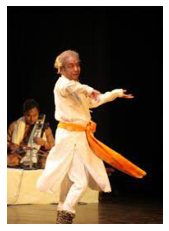

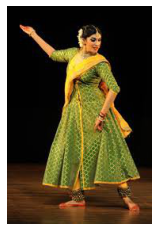

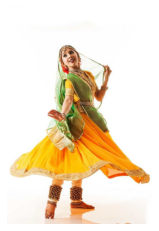

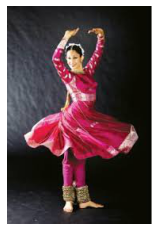

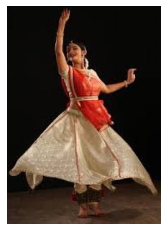

In [7]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

pic_index = 5

next_class = [os.path.join(c_dir, fname) 
                for fname in c_files[pic_index-5:pic_index]]

for i, img_path in enumerate(next_class):
  #print(img_path)
  img = mpimg.imread(img_path)
  plt.imshow(img)
  plt.axis('Off')
  plt.show()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [8]:
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
pretrained_model=InceptionV3(
    include_top=False, weights='imagenet', input_shape=(400,400,3))
for layer in pretrained_model.layers:
  layer.trainable=False
pretrained_model.summary()

87916544/87910968 [==============================] - 1s 0us/step
Model: "inception_v3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 400, 400, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 199, 199, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 199, 199, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 199, 199, 32) 0           batch_normalization[0][0]        
______________________

In [9]:
# last_layer=pretrained_model.get_layer("mixed7")
# x = last_layer.output
# x = layers.Conv2D(64, 1,activation='relu')(x)
# x = layers.Conv2D(128, 2 , activation='relu')(x)
# x = layers.MaxPooling2D(2)(x)
# x = layers.Flatten()(x)
# x=layers.Dense(256,activation='relu')(x)
# x = layers.Dropout(0.5)(x)
# x=layers.Dense(64,activation='relu')(x)
# x=layers.Dense(8,activation="softmax")(x)
# model=Model(pretrained_model.input,x)
# model.summary()


last_layer=pretrained_model.get_layer("mixed7")
x = last_layer.output
x = layers.Conv2D(150, 1,activation='relu')(x)
x = layers.Conv2D(150, 2,activation='relu')(x)
x = layers.MaxPooling2D(2)(x)

x = layers.Flatten()(x)
x=layers.Dense(300,activation='relu')(x)
x = layers.Dropout(0.5)(x)
x=layers.Dense(75,activation='relu')(x)
x=layers.Dense(8,activation="softmax")(x)
model=Model(pretrained_model.input,x)
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 400, 400, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 199, 199, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 199, 199, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 199, 199, 32) 0           batch_normalization[0][0]        
______________________________________________________________________________________________

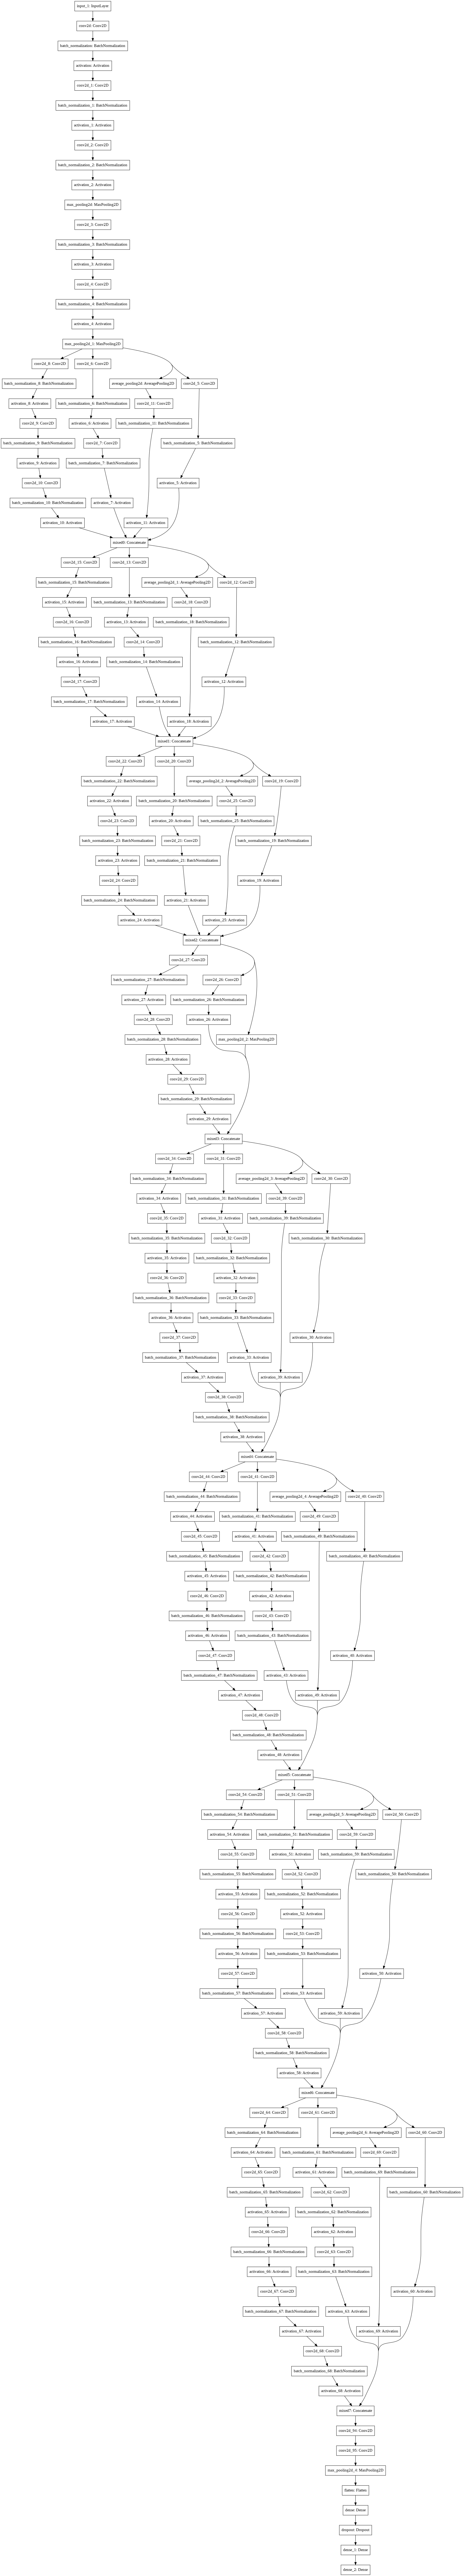

In [10]:
import tensorflow as tf
tf.keras.utils.plot_model(
    model, to_file='model.png', show_shapes=False, show_layer_names=True,
    rankdir='TB', expand_nested=False, dpi=96
)

In [ ]:
import tensorflow as tf
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator

TRAINING_DIR = "/content/drive/My Drive/testing/train"
training_datagen = ImageDataGenerator(
      rescale = 1./255,
	    rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')


train_generator = training_datagen.flow_from_directory(
	TRAINING_DIR,
	target_size=(400,400),
	class_mode='categorical',
  batch_size=128
)


model.summary()
print(train_generator.class_indices)

class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(epoch>400):
      if epoch%4==0:
        print("\nsaving training!")
        model.save('/content/drive/My Drive/save model 2/'+str(epoch)+'.h5') 
callbacks = myCallback()
optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.0002)
model.compile(loss = 'categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

history = model.fit(train_generator, epochs=500, steps_per_epoch=2, shuffle=True, verbose = 1,callbacks=[callbacks])

model.save("dance_type.h5")

In [ ]:
model.save('/content/drive/My Drive/save model 2/last.h5') 

In [ ]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
classification=['bharatanatyam','kathak','kathakali','kuchipudi','manipuri','mohiniyattam','odissi','sattriya']

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(400, 400))
  x = image.img_to_array(img)
  x = x.astype('float32')
  x = x/255 # normalized to [0,1]
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(fn)
  print(classification[np.argmax(classes)])

In [ ]:
import numpy as np
classification=['bharatanatyam','kathak','kathakali','kuchipudi','manipuri','mohiniyattam','odissi','sattriya']
c=classification[0]
c_dir=os.path.join(train_dir,c)
c_files = os.listdir(c_dir)
pic_index = 6
image_path=os.path.join(c_dir,c_files[pic_index])
img = mpimg.imread(image_path)
plt.imshow(img)
plt.axis('Off')
plt.show()
img = image.load_img(image_path, target_size=(400, 400))
# plt.imshow(img)
# plt.axis('Off')
# plt.show()
x = image.img_to_array(img)
x = x.astype('float32')
x = x/255 # normalized to [0,1]
x = np.expand_dims(x, axis=0)
classes = model.predict(x, batch_size=10)
print(classes)
print(np.argmax(classes))
print(classification[np.argmax(classes)])
print(image_path)

In [ ]:
correct=0
total=0
for clas in classification:
  c=clas
  c_dir=os.path.join(train_dir,c)
  c_files = os.listdir(c_dir)
  class_correct=0
  class_total=0
  for c_f in c_files:
    image_path=os.path.join(c_dir,c_f)
    img = image.load_img(image_path, target_size=(400, 400))
    x = image.img_to_array(img)
    x = x.astype('float32')
    x = x/255 # normalized to [0,1]
    x = np.expand_dims(x, axis=0)
    classes = model.predict(x, batch_size=10)
    if classification[np.argmax(classes)]==clas:
      correct=correct+1
      class_correct=class_correct+1
    total=total+1
    class_total=class_total+1
  print("correct in "+ clas +" is " + str(class_correct) + " out of " +  str(class_total))
  class_correct=0
  class_total=0
print("correct in all is " + str(correct) + " out of " + str(total))
print("accuracy:" + str(correct/total *100))

In [ ]:
from tensorflow.keras.models import load_model
model = load_model('/content/drive/My Drive/save model 2/model.h5')

In [ ]:
import csv
csv_data=[('Image','target')]
testing_dir = os.path.join('/content/drive/My Drive/testing/test')
with open('/content/drive/My Drive/testing/test.csv') as file:
  csvread=csv.reader(file)
  fields=next(csvread)
  for row in csvread:
    image_path=os.path.join(testing_dir,row[0])
    img = image.load_img(image_path, target_size=(400, 400))
    x = image.img_to_array(img)
    x = x.astype('float32')
    x = x/255 # normalized to [0,1]
    x = np.expand_dims(x, axis=0)
    classes = model.predict(x, batch_size=10)
    csv_data.append((row[0],classification[np.argmax(classes)]))

In [ ]:
print(csv_data)

In [ ]:
import csv
csvfile=open('/content/drive/My Drive/testing/predict.csv','w', newline='')
obj=csv.writer(csvfile)
for csv_d in csv_data:
  obj.writerow(csv_d)
csvfile.close()

In [ ]:
import os
save_dir = os.path.join('/content/drive/My Drive/save model 2')

In [ ]:
save_files = os.listdir(save_dir)
print('total saves:', len(os.listdir(save_dir)))
print(save_files)

total saves: 12
['152.h5', '156.h5', '160.h5', '164.h5', '168.h5', '172.h5', '176.h5', '180.h5', '184.h5', '188.h5', '192.h5', '196.h5']


In [ ]:
import csv
import numpy as np
from keras.preprocessing import image
classification=['bharatanatyam','kathak','kathakali','kuchipudi','manipuri','mohiniyattam','odissi','sattriya']
from tensorflow.keras.models import load_model
next_save = [os.path.join(save_dir, fname) for fname in save_files]

for i,save_path in enumerate(next_save):

  model = load_model(save_path)

  csv_data=[('Image','target')]
  testing_dir = os.path.join('/content/drive/My Drive/testing/test')
  with open('/content/drive/My Drive/testing/test.csv') as file:
    csvread=csv.reader(file)
    fields=next(csvread)
    for row in csvread:
      image_path=os.path.join(testing_dir,row[0])
      img = image.load_img(image_path, target_size=(300, 300))
      x = image.img_to_array(img)
      x = x.astype('float32')
      x = x/255 # normalized to [0,1]
      x = np.expand_dims(x, axis=0)
      classes = model.predict(x, batch_size=10)
      csv_data.append((row[0],classification[np.argmax(classes)]))

  csvfile=open('/content/drive/My Drive/prediction/predict'+str(i+1)+'.csv','w', newline='')
  obj=csv.writer(csvfile)
  for csv_d in csv_data:
    obj.writerow(csv_d)
  csvfile.close()
  print(str(i+1)+' done')

Using TensorFlow backend.


1 done
2 done
3 done
4 done
5 done
6 done
7 done
8 done
9 done
10 done
11 done
12 done
